#3-5 maximum likelihood Anne Cloutier GitHub: Vetiver5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [2]:

#1. Write an implementation of the bisection algorith, bisect(f, lower, upper, tol) which, given a function f,
#a lower bound lower and an upper bound upper finds the point x where f(x) = 0. The parameter tol is a numerical tolerance,
# you should stop once your step size is smaller than tol.

#bisection function: https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/


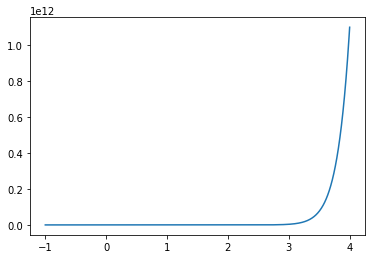

In [3]:
#prep: import packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

#1. Plot the function that needs to be minimized

f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1

#assign range
x = np.linspace(-1,4,1000)

#Plot what this function looks like before bisection
plt.plot(x, f(x))
plt.show()


In [4]:
#2. Write bisection function
#(using https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/)

N=10e-5

def bisection(f,a,b,N):
    lower, upper = a, b
    while upper - lower > N:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper
    return 0.5 * (upper + lower) 


In [5]:
#Feed F and its values into the bisection function
b = bisection(f,0,1,N)
print(b)

0.408294677734375


# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [6]:
#load more packages
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
mov1 = pd.read_csv("/content/drive/MyDrive/3-5-optimization/movies/movies_metadata.csv")
mov1.dtypes

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [8]:
mov1.isnull().sum()
#immediately, i can see that i'll cut belongs_to_collection, homepage, poster_path, tagline.

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
##Prepare to join data sets
#a. ID is an object. convert to numeric dtype so I can join with the credits data on this column
print(mov1[pd.to_numeric(mov1['id'], errors='coerce').isnull()])
mov1["id"] =pd.to_numeric(mov1['id'], errors='coerce',downcast="integer")

                                                   adult  ... vote_count
19730                                 - Written by Ørnås  ...        NaN
29503   Rune Balot goes to a casino connected to the ...  ...        NaN
35587   Avalanche Sharks tells the story of a bikini ...  ...        NaN

[3 rows x 24 columns]


In [10]:
#drop null values
mov1.dropna(subset=['id'], inplace=True)
mov1.shape

(45463, 24)

In [11]:
#Prepare join #b
#drop metadata df columns with no immediately measurable impact on revenue estimation
#Also looking to be able to compute results efficiently : )
mov2 = mov1.drop(['adult', 'belongs_to_collection','homepage','imdb_id',
                  'poster_path','spoken_languages','tagline','production_countries',
                  'tagline','title','overview','video'], axis=1)
mov2.head(10)

,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,status,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Released,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Released,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Released,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Released,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,en,Father of the Bride Part II,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Released,5.7,173.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949.0,en,Heat,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,Released,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860.0,en,Sabrina,6.67728,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",1995-12-15,0.0,127.0,Released,6.2,141.0
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325.0,en,Tom and Huck,2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1995-12-22,0.0,97.0,Released,5.4,45.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091.0,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-12-22,64350171.0,106.0,Released,5.5,174.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710.0,en,GoldenEye,14.686,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,130.0,Released,6.6,1194.0


In [12]:
#clean up production company column
prod_a = pd.Series(mov2['production_companies'], dtype=str)
prod_b = prod_a.str.split(pat="'",expand=True)
mov2['prod_clean'] = prod_b[3]
mov2.head(5)

#clean up genre column
g = pd.Series(mov2['genres'], dtype=str)
g1 = g.str.split(pat="'",expand=True)
mov2['genre_clean'] = g1[5]
mov2.head(5)

#drop original messy genre and prod columns
mov3 = mov2.drop(['genres','production_companies'],axis=1)
mov3.head(3)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,prod_clean,genre_clean
0,30000000,862.0,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,7.7,5415.0,Pixar Animation Studios,Animation
1,65000000,8844.0,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,6.9,2413.0,TriStar Pictures,Adventure
2,0,15602.0,en,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Released,6.5,92.0,Warner Bros.,Romance


In [13]:
#Now load credit df to get to director info
cred=pd.read_csv("/content/drive/MyDrive/3-5-optimization/movies/credits.csv")

#check data types
cred.dtypes

cast    object
crew    object
id       int64
dtype: object

In [14]:
pd.options.display.max_colwidth = 300
cred.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'ge...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Scr...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f8...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'J...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2, 'id': 6837, 'name': 'Walter Matthau', 'order': 0, 'profile_path': '/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg'}, {'cast_id': 3, 'character': 'John Gustafson', 'credit_id': '52fe466a9251416c75077a91', 'gender'...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, 'job': 'Director', 'name': 'Howard Deutch', 'profile_path': '/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg'}, {'credit_id': '52fe466b9251416c75077aa3', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Ch...",15602


In [15]:
#so the director name comes out at the 19th occurence of "'"
#clean up crew column to extract the director's name
d = pd.Series(cred['crew'], dtype=str)
d1 = d.str.split(pat="'",expand=True)
cred['director'] = d1[19]


In [16]:
#that works. now drop messy cast and crew columns from df, keeping just the id and director
cred_join = cred.drop(['cast','crew'],axis=1)
cred_join.head(10)

,id,director
0,862,John Lasseter
1,8844,Larry J. Franco
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Alan Silvestri
5,949,Michael Mann
6,11860,Sydney Pollack
7,45325,David Loughery
8,9091,Peter Hyams
9,710,Martin Campbell


In [18]:
#merge metadata and credit dfs on the 'id' column
mov2 = mov2.merge(cred,on=["id"],how="left")
mov2.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,status,vote_average,vote_count,prod_clean,genre_clean,cast_x,crew_x,director_x,cast_y,crew_y,director_y
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862.0,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Released,7.7,5415.0,Pixar Animation Studios,Animation,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'ge...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Scr...",John Lasseter,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'ge...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Scr...",John Lasseter
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844.0,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]",1995-12-15,262797249.0,104.0,Released,6.9,2413.0,TriStar Pictures,Adventure,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f8...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'J...",Larry J. Franco,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f8...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'J...",Larry J. Franco
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",15602.0,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]",1995-12-22,0.0,101.0,Released,6.5,92.0,Warner Bros.,Romance,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2, 'id': 6837, 'name': 'Walter Matthau', 'order': 0, 'profile_path': '/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg'}, {'cast_id': 3, 'character': 'John Gustafson', 'credit_id': '52fe466a9251416c75077a91', 'gender'...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, 'job': 'Director', 'name': 'Howard Deutch', '

In [46]:
#drop columns with a less direct link to revenue
mov3 = mov2.drop(columns=['id', 'runtime','original_title','genres','original_language', 'production_companies', 'release_date', 'status', 'cast_x', 'crew_x', 'director_x', 'cast_y','crew_y'])
mov3.head()

,budget,popularity,revenue,vote_average,vote_count,prod_clean,genre_clean,director_y
0,30000000,21.9469,373554033.0,7.7,5415.0,Pixar Animation Studios,Animation,John Lasseter
1,65000000,17.0155,262797249.0,6.9,2413.0,TriStar Pictures,Adventure,Larry J. Franco
2,0,11.7129,0.0,6.5,92.0,Warner Bros.,Romance,Howard Deutch
3,16000000,3.85949,81452156.0,6.1,34.0,Twentieth Century Fox Film Corporation,Comedy,Forest Whitaker
4,0,8.38752,76578911.0,5.7,173.0,Sandollar Productions,Comedy,Alan Silvestri


In [48]:
#with this cleaner df
#start engineering data

#clean up budget and revenue columns
import numpy as np

clean_cash = ['budget', 'revenue']
for c in clean_cash:
    mov3[c] = pd.to_numeric(mov3[c], errors='coerce')
    mov3.loc[mov3[c] ==0, c] = np.nan


In [49]:
#drop missing values on the Y value
mov3 = mov3.dropna(subset=clean_cash).reset_index(drop=True)

In [51]:
#define column type
num_col = ['vote_average',	'vote_count']
cat_col = ['prod_clean',	'genre_clean']

X = mov3[num_col].copy()
for c in num_col:
    X[c] = pd.to_numeric(X[c], errors='coerce')
    X[c] = X[c].fillna(0)
    X[c+'2'] = X[c] ** 2
    X[c + '_is_missing'] = (X[c] < 0).astype(int)

for c in cat_col:
  X = X.join(pd.get_dummies(mov3[c], drop_first=True, prefix=c))

for c in X.columns:
  if X[c].std() < 0.0001:
    X = X.drop(columns=c)

X = sm.add_constant(X)

X

#Note: trying this with directors kept on crashing, so I went for Production companies and genres

#Highest grossing films are not necessarily produced by Hollywood:
#Production outfits with a coeff > 9 (a few):
#Great American Films, Happy End Films, Hobby Films, Kinoshita Management, Arte
#New South Wales Films and Television, Produzioni de Sica, Wadleigh-Maurice

#Most proditable genres as not what (snobby) cinephile me expected:
#1. Fantasy; 2. Family. 3. Comedy. 
#Now I know why these awful Men In Black repeats happen : )

,const,vote_average,vote_count,vote_average2,vote_count2,"prod_clean_ Company"",","prod_clean_ Crew"",",prod_clean_100 Bares,prod_clean_10th Hole Productions,prod_clean_120dB Films,prod_clean_1492 Pictures,prod_clean_1818,prod_clean_19 Entertainment,prod_clean_20th Century Fox,prod_clean_21 Laps Entertainment,prod_clean_21st Century Film Corporation,prod_clean_26 Films,prod_clean_2929 Productions,prod_clean_3 Arts Entertainment,prod_clean_3311 Productions,prod_clean_360 Pictures,prod_clean_3Mark Entertainment,prod_clean_40 Acres & A Mule Filmworks,prod_clean_A Band Apart,prod_clean_A Bigger Boat,prod_clean_A Loopy Production LLC,prod_clean_A.F. Cinema e Vídeo,prod_clean_A24,prod_clean_ABC Motion Pictures,prod_clean_ABC Pictures,prod_clean_ABS-CBN Film Productions,prod_clean_APT Entertainment,prod_clean_ARD Degeto Film,prod_clean_ARP Sélection,prod_clean_ARTE France Cinéma,prod_clean_AVCO Embassy Pictures,prod_clean_AVM Productions,prod_clean_Aamir Khan Productions,prod_clean_Aardman Animations,prod_clean_Aascar Films,...,prod_clean_Zentropa Productions,prod_clean_Zero Gravity Management,prod_clean_Zillion Films,prod_clean_Zininsa Film Production,prod_clean_Zoetrope Studios,prod_clean_Zweites Deutsches Fernsehen (ZDF),prod_clean_Zyzzyx LLC,prod_clean_abramoff Production,prod_clean_area japan,prod_clean_barefoot films,prod_clean_erbp,prod_clean_iDeal Partners Film Fund,prod_clean_icon,prod_clean_logan films,"prod_clean_s Incorporated"",","prod_clean_s Significant Productions"",","prod_clean_s"",",prod_clean_Österreichischer Rundfunk (ORF),prod_clean_Вольга,prod_clean_Кинокомпания «Lunapark»,prod_clean_Фокс,genre_clean_Adventure,genre_clean_Animation,genre_clean_Comedy,genre_clean_Crime,genre_clean_Documentary,genre_clean_Drama,genre_clean_Family,genre_clean_Fantasy,genre_clean_Foreign,genre_clean_History,genre_clean_Horror,genre_clean_Music,genre_clean_Mystery,genre_clean_Romance,genre_clean_Science Fiction,genre_clean_TV Movie,genre_clean_Thriller,genre_clean_War,genre_clean_Western
0,1.0,7.7,5415.0,59.29,29322225.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,6.9,2413.0,47.61,5822569.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,6.1,34.0,37.21,1156.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,7.7,1886.0,59.29,3556996.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,5.5,174.0,30.25,30276.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,1.0,6.9,25.0,47.61,625.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5413,1.0,6.0,4.0,36.00,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5414,1.0,5.8,6.0,33.64,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5415,1.0,4.0,3.0,16.00,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [56]:
import statsmodels.api as sm
import numpy as np

In [62]:
y = mov3.revenue - mov3.budget

sm.OLS(y, X).fit(cov_type='HC2').summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1827: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_HC2))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1380, but rank is 1375
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                -3.875e+07
Date:                Tue, 25 May 2021   Prob (F-statistic):               1.00
Time:                        01:37:21   Log-Likelihood:            -1.0637e+05
No. Observations:                5417   AIC:                         2.155e+05
Df Residuals:                    4038   BIC:                         2.246e+05
Df Model:                        1378                                         
Covariance Type:                  HC2                                         
========================================================================================================================================================
                                                                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                -1.401e+08   3.79e+07     -3.700      0.000   -2.14e+08   -6.59e+07
vote_average                                                                          5.915e+07   1.31e+07      4.511      0.000    3.35e+07    8.49e+07
vote_count                                                                            8.879e+04   9155.141      9.699      0.000    7.09e+04    1.07e+05
vote_average2                                                                        -5.803e+06   1.12e+06     -5.190      0.000   -7.99e+06   -3.61e+06
vote_count2                                                                             -0.5931      1.815     -0.327      0.744      -4.150       2.964
prod_clean_ Company",                                                                -2.052e+07   3.23e+07     -0.635      0.526   -8.39e+07    4.29e+07
prod_clean_ Crew",                                                                   -1.155e+07   7.14e+06     -1.618      0.106   -2.55e+07    2.44e+06
prod_clean_100 Bares                                                                 -2.626e+07   4.71e+07     -0.558      0.577   -1.18e+08     6.6e+07
prod_clean_10th Hole Productions                                                     -3.067e+07   3.62e+06     -8.480      0.000   -3.78e+07   -2.36e+07
prod_clean_120dB Films                                                               -2.591e+07   3.29e+06     -7.888      0.000   -3.24e+07   -1.95e+07
prod_clean_1492 Pictures                                                              1.527e+08   8.51e+07      1.794      0.073   -1.42e+07     3.2e+08
prod_clean_1818                                                                      -8.398e+06    4.3e+06     -1.952      0.051   -1.68e+07     3.3e+04
prod_clean_19 Entertainment                                                          -3.047e+06   9.87e+06     -0.309      0.758   -2.24e+07    1.63e+07
prod_clean_20th Century Fox                                                           4.469e+06   1.48e+07      0.302      0.763   -2.45e+07    3.35e+07
prod_clean_21 Laps Entertainment                                                     -6.201e+07   3.13e+07     -1.983      0.047   -1.23e+08   -7.12e+05
prod_clean_21st Century Film Corporation                                             -1.796e+07   4.39e+06     -4.087      0.000   -2.66e+07   -9.34e+06
prod_clean_26 Films                                                                   -4.64e+06   8.18e+06     -0.567      0.570   -2.07e+07    1.14e+07
prod_clean_2929 Product

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [61]:
np.linalg.inv(X.T @ X) @ X.T @ y

0       1.038210e+12
1      -2.961591e+11
2       1.009066e+07
3       2.103412e+10
4      -6.772503e+02
            ...     
1376    3.650572e+09
1377   -1.284419e+29
1378    4.857970e+09
1379    7.939436e+09
1380    2.028019e+09
Length: 1381, dtype: float64

In [ ]:
#I've run this a few times and the coefficients match in some places, not others.

# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [ ]:
funct = lambda betas : np.mean( (y - X @ betas) ** 2 )

from scipy.optimize import minimize
betas = np.random.rand(X.shape[1])

minimize(funct, betas, method='powell', tol=1e-10)

In [63]:
betas = np.random.rand(X.shape[1])
betas

array([0.63816635, 0.15916689, 0.63694247, ..., 0.12338002, 0.2562373 ,
       0.32632533])